Лабораторна робота №3, виконав Приймак Євгеній (група КА-13)

Тема: Навчання регресiйної моделi 
градiєнтними методами в TensorFlow

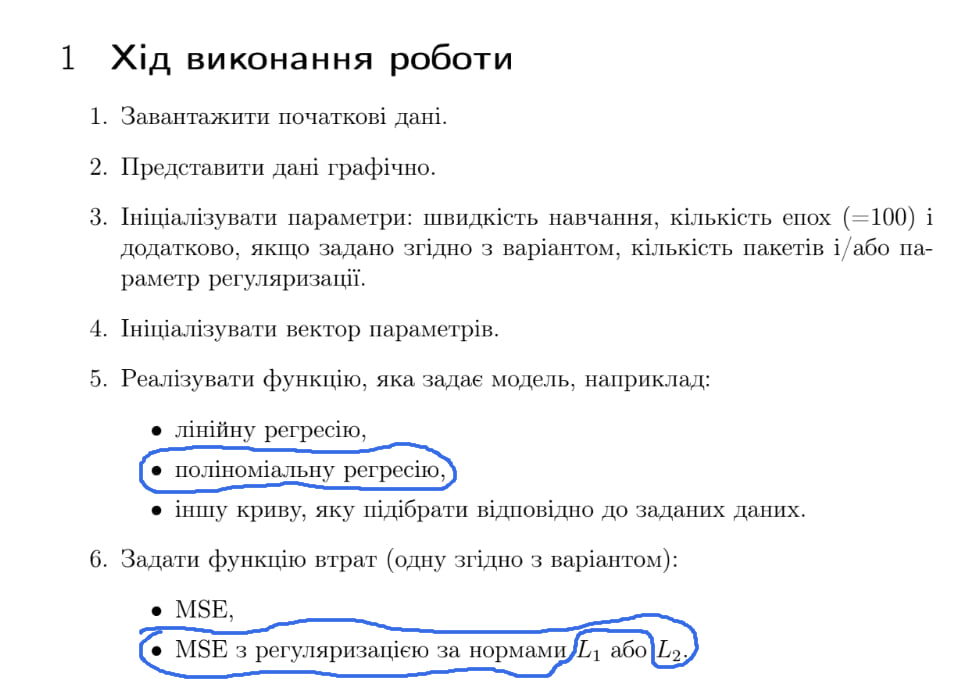
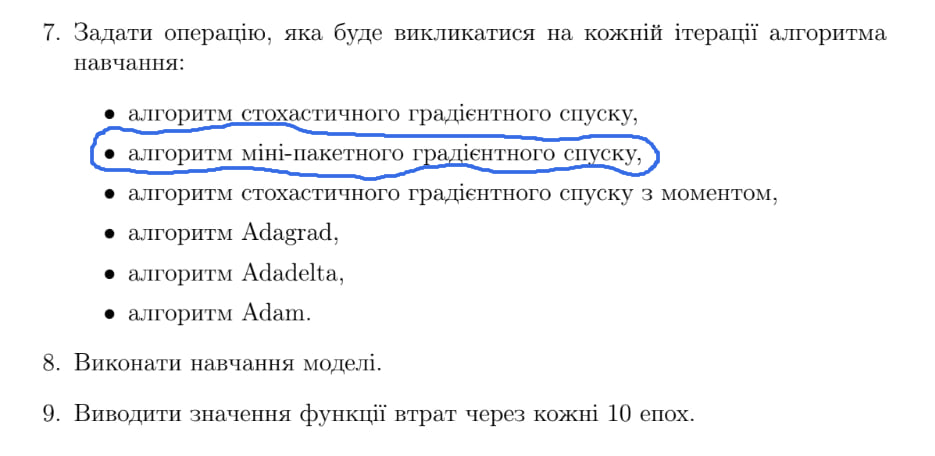
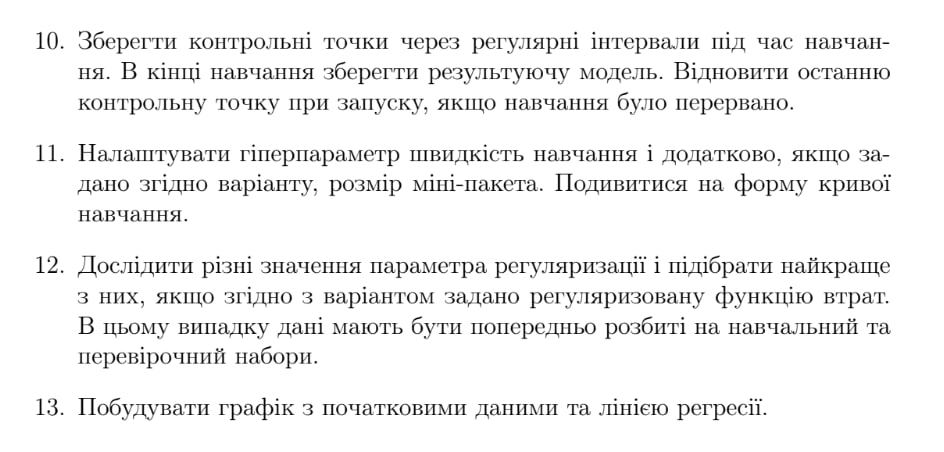7:21]


Варіант 2:

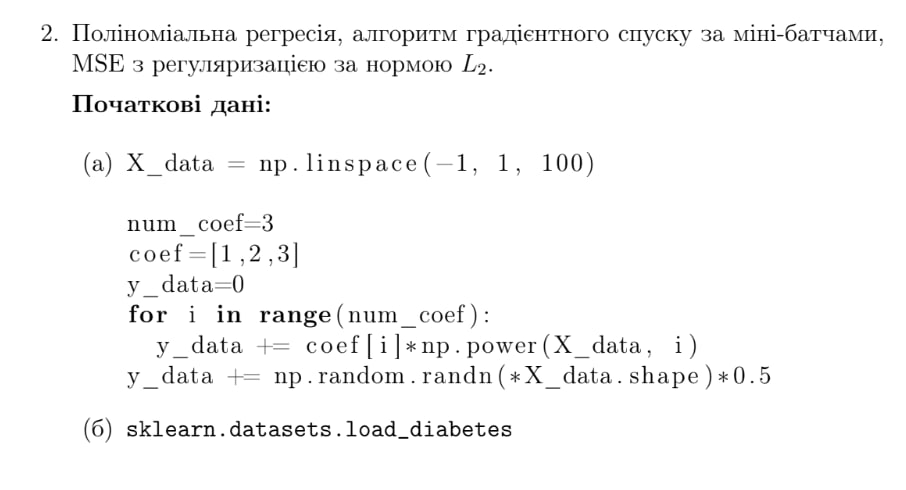_diabetes

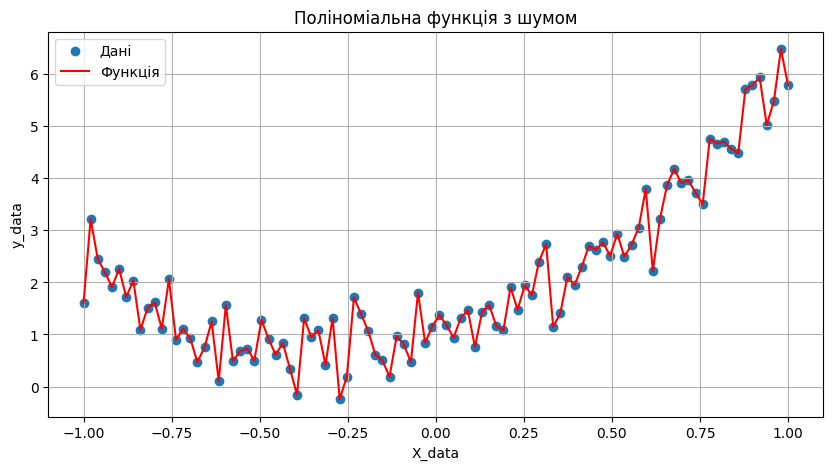

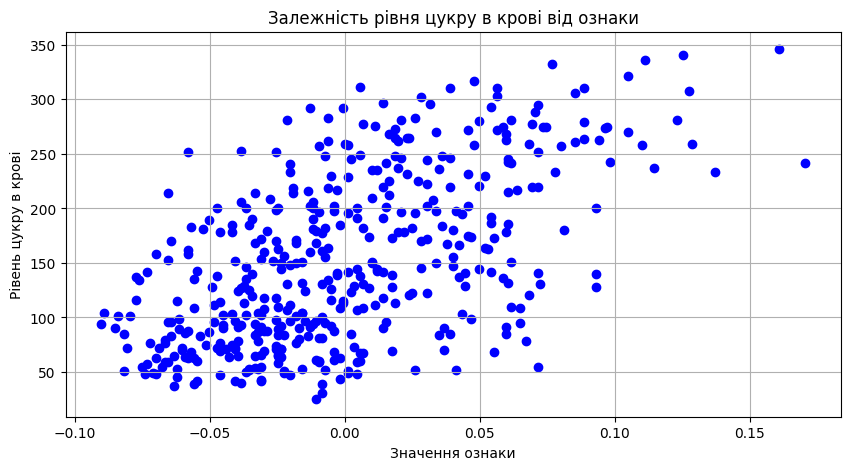

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Завдання (а)
X_data = np.linspace(-1, 1, 100)
num_coef = 3
coef = [1, 2, 3]
y_data = 0
for i in range(num_coef):
    y_data += coef[i] * np.power(X_data, i)
y_data += np.random.randn(*X_data.shape) * 0.5

# Представлення даних графічно для завдання (а)
plt.figure(figsize=(10, 5))
plt.scatter(X_data, y_data, label='Дані')
plt.plot(X_data, y_data, color='red', label='Функція')
plt.xlabel('X_data')
plt.ylabel('y_data')
plt.title('Поліноміальна функція з шумом')
plt.legend()
plt.grid(True)
plt.show()

# Завдання (б)
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Представлення даних графічно для завдання (б)
plt.figure(figsize=(10, 5))
plt.scatter(X_diabetes[:, 2], y_diabetes, color='blue')
plt.xlabel('Значення ознаки')
plt.ylabel('Рівень цукру в крові')
plt.title('Залежність рівня цукру в крові від ознаки')
plt.grid(True)
plt.show()

Для опрацювання візьмемо набір (б) з ознаками діабету

In [2]:

from __future__ import division, print_function, unicode_literals
import numpy as np
import os

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


Завантажимо набір та нормалізуємо його:

In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
import tensorflow as tf

# Очистка графу TensorFlow
tf.compat.v1.reset_default_graph()

# Завантаження даних
diab = load_diabetes()
m, n = diab.data.shape
diab_data_plus_bias = np.c_[np.ones((m, 1)), diab.data]

# Створення констант TensorFlow
X = tf.constant(diab_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(diab.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
w_normal = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

# Виконання сесії TensorFlow
with tf.compat.v1.Session() as sess:
    w_value = w_normal.eval()

print(w_value)

[[ 152.1335  ]
 [ -10.010506]
 [-239.81557 ]
 [ 519.8457  ]
 [ 324.3846  ]
 [-792.1938  ]
 [ 476.75833 ]
 [ 101.04882 ]
 [ 177.06186 ]
 [ 751.27954 ]
 [  67.62705 ]]


Використання градієнтного спуску:

In [5]:
#Нормування ознак
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_diab_data = scaler.fit_transform(diab.data)
scaled_diab_data_plus_bias = np.c_[np.ones((m, 1)), scaled_diab_data]


print(scaled_diab_data_plus_bias.mean(axis=0))
print(scaled_diab_data_plus_bias.mean(axis=1))
print(scaled_diab_data_plus_bias.mean())
print(scaled_diab_data_plus_bias.shape)

[ 1.00000000e+00 -8.03781375e-18  1.22074296e-16  6.53072367e-18
 -1.14538846e-16  5.52599696e-18 -6.53072367e-18 -1.10519939e-17
  1.27349112e-16  8.60297253e-18 -7.20577444e-17]
[ 1.85609078e-01 -4.39568533e-01  1.61527401e-01 -1.63626747e-01
 -1.14204000e-01 -8.99872424e-01 -4.11440971e-01  8.29174990e-01
  2.27291146e-01 -1.57800585e-01 -1.05221478e+00 -2.23201481e-03
 -1.92311255e-01  2.08689558e-01 -7.18763594e-02  7.00868100e-01
  3.91703024e-01  6.53514680e-01 -3.94298940e-01 -3.10757150e-01
 -5.17151605e-01 -3.55148066e-01 -3.48139807e-01  9.60592681e-01
 -3.57665813e-01 -1.36317081e-01 -9.39255082e-01 -1.74065013e-01
 -4.19792846e-01  3.28258702e-01 -1.96069715e-01 -6.81016086e-01
  4.85404824e-01 -2.40627738e-01 -7.00490621e-01  4.45106220e-01
  1.86769708e-01 -2.25271341e-01  1.09658806e+00  9.66898578e-02
  6.90455594e-01 -9.63392156e-01 -2.80599914e-01  2.24983809e-02
  4.15205460e-01  6.50216410e-02 -6.19173921e-01 -1.01393653e+00
  1.22555401e-01  1.50880526e-01 -1.7787

Використання готового оптимiзатора 
GradientDescentOptimizer

In [6]:
# Створення графу обчислень
tf.compat.v1.reset_default_graph()

# Параметри моделі
n_epochs = 1000
learning_rate = 0.01   # learning_rate = 0.001

# Визначення вхідних даних та цільової змінної
X = tf.constant(scaled_diab_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(diab.target.reshape(-1, 1), dtype=tf.float32, name="y")

# Ваги моделі
w = tf.Variable(tf.random.uniform([n + 1, 1], -1.0, 1.0, seed=42), name="w")

# Побудова моделі
y_pred = tf.matmul(X, w, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="MSE")

# Оптимізатор та операція навчання
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

# Ініціалізація змінних
init = tf.compat.v1.global_variables_initializer()

# Виконання сесії TensorFlow
with tf.compat.v1.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)

    best_w = w.eval()

print("Best weights:")
print(best_w)


Epoch 0 MSE = 28721.904
Epoch 100 MSE = 3309.5386
Epoch 200 MSE = 2889.6663
Epoch 300 MSE = 2880.8816
Epoch 400 MSE = 2879.9197
Epoch 500 MSE = 2879.1921
Epoch 600 MSE = 2878.5085
Epoch 700 MSE = 2877.856
Epoch 800 MSE = 2877.2307
Epoch 900 MSE = 2876.6301
Best weights:
[[152.13312  ]
 [ -0.3292203]
 [-11.248327 ]
 [ 25.109663 ]
 [ 15.30358  ]
 [ -6.6999598]
 [ -2.1189246]
 [ -8.798891 ]
 [  4.8847036]
 [ 24.079506 ]
 [  3.322585 ]]


Градієнтний спуск з міні-батчами:

In [8]:
tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.compat.v1.placeholder(tf.float32, shape=(None, 1), name="y")

w = tf.Variable(tf.compat.v1.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="w")
y_pred = tf.matmul(X, w, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.compat.v1.global_variables_initializer()

learning_rate = 0.01
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(m, size=batch_size)
    X_batch = scaled_diab_data_plus_bias[indices]
    y_batch = diab.target.reshape(-1, 1)[indices]
    return X_batch, y_batch


with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_w = w.eval()

best_w

array([[96.73729   ],
       [ 0.37292126],
       [-5.783088  ],
       [20.06311   ],
       [11.686993  ],
       [ 1.8331364 ],
       [-1.414305  ],
       [-8.417817  ],
       [ 6.8553925 ],
       [14.926998  ],
       [ 6.1159024 ]], dtype=float32)

Задамо функцію втрат та збережемо модель:

In [9]:
tf.compat.v1.reset_default_graph()
# починаємо з порожнього графу

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_diab_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(diab.target.reshape(-1, 1), dtype=tf.float32, name="y")

w = tf.Variable(tf.compat.v1.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="w")
y_pred = tf.matmul(X, w, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

with tf.compat.v1.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)

    best_w = w.eval()

    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

Epoch 0 MSE = 28721.904
Epoch 100 MSE = 3309.5386
Epoch 200 MSE = 2889.6663
Epoch 300 MSE = 2880.8816
Epoch 400 MSE = 2879.9197
Epoch 500 MSE = 2879.1921
Epoch 600 MSE = 2878.5085
Epoch 700 MSE = 2877.856
Epoch 800 MSE = 2877.2307
Epoch 900 MSE = 2876.6301


In [10]:
best_w

array([[152.13312  ],
       [ -0.3292203],
       [-11.248327 ],
       [ 25.109663 ],
       [ 15.30358  ],
       [ -6.6999598],
       [ -2.1189246],
       [ -8.798891 ],
       [  4.8847036],
       [ 24.079506 ],
       [  3.322585 ]], dtype=float32)

Перевіримо можливість відновлення навченої моделі:

In [11]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_w_restored = w.eval()
np.allclose(best_w, best_w_restored)

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


True

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # Вимкнути TensorFlow 2.x
saver = tf.train.Saver({"omega": w})

Спробуємо відновити граф:

In [13]:
tf.compat.v1.reset_default_graph()
# починаємо з порожнього графу

saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")  # завантаження структури графу
w = tf.get_default_graph().get_tensor_by_name("w:0")

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # відновлення стану графу, тобто значень змінних
    best_w_restored = w.eval()

best_w_restored


INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


E:\PyCharm\PyCharm projects\venv\Lib\site-packages\tensorflow\python\client\session.py:1478: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return tf_session.TF_SessionRun_wrapper(self._session, options, feed_dict,


array([(240,), (171,), ( 76,), (103,), (110,), (  2,), (  0,), (  0,),
       (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       ( 44,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       ( 47,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       (108,), (111,), ( 99,), ( 97,), (108,), (104,), (111,), (115,),
       (116,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       (  9,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       ( 15,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       (119,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       (  1,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       ( 15,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,), (  0,),
       ( 19,), (210,), (147,), (189,), (252,), ( 73,), ( 82,), (221,),
       (224,), (  9,), ( 72,), (103,), (110,), (  2,), (  0,), (  0,),
      

Візуалізація графу в TensorBoard

In [14]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

logdir


'tf_logs/run-20240326200414/'

In [15]:
#Створимо функцію, яка буде генерувати шлях до підкаталогу щоразу, коли він буде нам потрібний:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # Вимкнути TensorFlow 2.x зручення
def make_log_subdir(run_id=None):
    if run_id is None:
        run_id = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run-{}/".format(root_logdir, run_id)

#Збережемо граф за замовчуванням (default graph) у створений підкаталог (log subdirectory) за допомогою tf.summary.FileWriter():
file_writer = tf.compat.v1.summary.FileWriter(logdir, graph=tf.compat.v1.get_default_graph())
os.listdir(root_logdir)
#TF events file:
os.listdir(logdir)
#Переконаємось, що граф закінчив записуватися на диск:
file_writer.close()

In [16]:
def save_graph(graph=None, run_id=None):
        if graph is None:
            graph = tf.get_default_graph()
        logdir = make_log_subdir(run_id)
        file_writer = tf.summary.FileWriter(logdir, graph=graph)
        file_writer.close()
        return logdir
save_graph()

'tf_logs/run-20240326200416/'

In [17]:
tf.compat.v1.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

w = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="w")
y_pred = tf.matmul(X, w, name="predictions")
error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [18]:
logdir = make_log_subdir()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [19]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [20]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_w = w.eval()

In [21]:
file_writer.close()

best_w

array([[96.73729   ],
       [ 0.37292126],
       [-5.783088  ],
       [20.06311   ],
       [11.686993  ],
       [ 1.8331364 ],
       [-1.414305  ],
       [-8.417817  ],
       [ 6.8553925 ],
       [14.926998  ],
       [ 6.1159024 ]], dtype=float32)

Переглянемо в TensorBoard графік зміни значень функції втрат по епохам навчання (вкладка TIME SERIES)